# Setting everything up

In [1]:
import pandas as pd
from datetime import datetime


In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

pd.options.display.float_format = '{:,.2f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin


In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
from sklearn.feature_extraction.text import CountVectorizer


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Load dataframe

In [11]:
df_high_analysis=read_csv("df_anthem_notna.csv")

In [12]:
df_high_analysis

,Unnamed: 0,key_0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,error,track_id,track_name,country_x,country_y,c1,c2,c3,c4,c5,c6,Country,Alpha-2,Alpha-3,Continent,Anthem,country_lower,god,positivity,anger,sad,joy
0,0,angola,0.64,0.22,0.00,-18.45,1.00,0.03,0.89,0.96,0.09,0.57,110.73,audio_features,7hrCjUIObTQcDhUe4GzkCI,spotify:track:7hrCjUIObTQcDhUe4GzkCI,https://api.spotify.com/v1/tracks/7hrCjUIObTQc...,https://api.spotify.com/v1/audio-analysis/7hrC...,"77,827.00",4.00,NaN,7hrCjUIObTQcDhUe4GzkCI,"Angola: Angola [""O Fatherland, we shall never ...",Angola,angola,#CE1126,#000000,#F7D416,#97820D,#544807,#E3711E,Angola,AO,AGO,Africa,"O Fatherland, we shall never forget The heroes...",angola,absent,0.39,0.07,0.04,0.18
1,1,belgium,0.50,0.11,7.00,-19.04,1.00,0.03,0.93,0.91,0.21,0.54,100.94,audio_features,7goOE7w5L6R4x8Zx4B2qvu,spotify:track:7goOE7w5L6R4x8Zx4B2qvu,https://api.spotify.com/v1/tracks/7goOE7w5L6R4...,https://api.spotify.com/v1/audio-analysis/7goO...,"62,813.00",3.00,NaN,7goOE7w5L6R4x8Zx4B2qvu,"Belgium: La Brabançonne (The Song of Brabant),...",Belgium,belgium,#000000,#ED2939,#FAE042,NaN,NaN,NaN,Belgium,BE,BEL,Europe,"O dear Belgium, O holy land of the fathers Ã¢â...",belgium,absent,0.67,0.00,0.07,0.27
2,2,belize,0.32,0.18,5.00,-17.78,1.00,0.04,0.92,0.92,0.06,0.31,87.99,audio_features,2KuAxqFIaj3IUCapI3ZVwe,spotify:track:2KuAxqFIaj3IUCapI3ZVwe,https://api.spotify.com/v1/tracks/2KuAxqFIaj3I...,https://api.spotify.com/v1/audio-analysis/2KuA...,"68,000.00",4.00,NaN,2KuAxqFIaj3IUCapI3ZVwe,"Belize: Land of the Free, ""O Land of the Free ...",Belize,belize,#003F87,#CE1126,#D5DBD6,#2A9104,#63A55C,#D0AF4C,Belize,BZ,BLZ,North_America,"O, Land of the Free by the Carib Sea, Our manh...",belize,present,0.44,0.06,0.08,0.18
3,3,benin,0.36,0.38,0.00,-12.76,1.00,0.04,0.50,0.94,0.11,0.41,101.33,audio_features,3FZAqRf9D0B9yaK6U6kK3m,spotify:track:3FZAqRf9D0B9yaK6U6kK3m,https://api.spotify.com/v1/tracks/3FZAqRf9D0B9...,https://api.spotify.com/v1/audio-analysis/3FZA...,"80,000.00",4.00,NaN,3FZAqRf9D0B9yaK6U6kK3m,Benin: L'aube nouvelle (The Dawn of a New Day)...,Benin,benin,#008751,#FCD116,#E8112D,NaN,NaN,NaN,Benin,BJ,BEN,Africa,"Long ago, at their call, our ancestors, withou...",benin,absent,0.52,0.04,0.06,0.31
4,4,bermuda,0.37,0.16,5.00,-16.94,1.00,0.04,0.80,0.89,0.22,0.38,89.15,audio_features,5FuQ1wUveHPYAxHmqAiutP,spotify:track:5FuQ1wUveHPYAxHmqAiutP,https://api.spotify.com/v1/tracks/5FuQ1wUveHPY...,https://api.spotify.com/v1/audio-analysis/5FuQ...,"56,120.00",4.00,NaN,5FuQ1wUveHPYAxHmqAiutP,Bermuda: Hail to Bermuda (short version),Bermuda,bermuda,NaN,NaN,NaN,NaN,NaN,NaN,Bermuda,BM,BMU,North_America,"Hail to Bermuda, My island in the sun. Sing ou...",bermuda,absent,0.55,0.00,0.10,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,venezuela,0.41,0.26,5.00,-14.44,1.00,0.05,0.94,0.93,0.07,0.45,171.87,audio_features,7dKi7UMkV7lpraAshf7Zim,spotify:track:7dKi7UMkV7lpraAshf7Zim,https://api.spotify.com/v1/tracks/7dKi7UMkV7lp...,https://api.spotify.com/v1/audio-analysis/7dKi...,"78,853.00",4.00,NaN,7dKi7UMkV7lpraAshf7Zim,"Venezuela: ""Glory to the brave nation which sh...",Venezuela,venezuela,#FFCC00,#CF142B,#00247D,#555C53,#441F62,#2E4B94,Venezuela,VE,VEN,South_America,Glory to the brave people which shook off the ...,venezuela,present,0.46,0.05,0.07,0.12
116,116,vietnam,0.38,0.23,10.00,-14.96,1.00,0.03,0.80,0.86,0.42,0.56,79.03,audio_features,1n4S6Bm7EJ7kEJO2MBVtS1,spotify:track:1n4S6Bm7EJ7kEJO2MBVtS1,https://api.spotify.com/v1/tracks/1n4S6Bm7EJ7k...,https://api.spotify.com/v1/audio-analysis/1n4S...,"73,587.00",4.00,NaN,1n4S6Bm7EJ7kEJO2MBVtS1,Vietnam: Tien Quan Ca (The Song of the Marchin...,Vietnam,vietnam,#DA251D,#FFFE00,#E67013,NaN,NaN,NaN,Vietnam,VN,VNM,Asia,"Soldiers of Vietnam, marching onwa

In [13]:
%%R

df_high_analysis_r <- read_csv('df_anthem_notna.csv')

New names:
• `` -> `...1`
Rows: 120 Columns: 42
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (23): key_0, type, id, uri, track_href, analysis_url, track_id, track_na...
dbl (18): ...1, danceability, energy, key, loudness, mode, speechiness, acou...
lgl  (1): error

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
highest_countries_df=df_high_analysis.query("Country.isin(['Brazil', 'Iran','Greenland','Malaysia'])")
highest_countries_df

,Unnamed: 0,key_0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,error,track_id,track_name,country_x,country_y,c1,c2,c3,c4,c5,c6,Country,Alpha-2,Alpha-3,Continent,Anthem,country_lower,god,positivity,anger,sad,joy
9,9,brazil,0.47,0.14,10.00,-18.38,1.00,0.04,0.82,0.23,0.36,0.52,122.84,audio_features,5yyBDd13Zb7eoVT86NPhO2,spotify:track:5yyBDd13Zb7eoVT86NPhO2,https://api.spotify.com/v1/tracks/5yyBDd13Zb7e...,https://api.spotify.com/v1/audio-analysis/5yyB...,"85,027.00",4.00,NaN,5yyBDd13Zb7eoVT86NPhO2,Brazil: Hino Nacional Brasilerio (National Ant...,Brazil,brazil,#009B3A,#FDDF00,#012876,#61B125,#304F90,#6FC790,Brazil,BR,BRA,South_America,The placid shores of the Ipiranga heard the re...,brazil,absent,0.56,0.09,0.11,0.39
31,31,greenland,0.47,0.02,0.00,-17.90,1.00,0.04,0.97,0.96,0.11,0.53,119.48,audio_features,0b0clBBEoH8sp9TOcXxUqN,spotify:track:0b0clBBEoH8sp9TOcXxUqN,https://api.spotify.com/v1/tracks/0b0clBBEoH8s...,https://api.spotify.com/v1/audio-analysis/0b0c...,"44,160.00",4.00,NaN,0b0clBBEoH8sp9TOcXxUqN,"Greenland: ""Our country, who's become so old y...",Greenland,greenland,NaN,NaN,NaN,NaN,NaN,NaN,Greenland,GL,GRL,North_America,"Our country, which has become so old your head...",greenland,absent,0.25,0.00,0.00,0.19
43,43,iran,0.29,0.15,7.00,-17.29,1.00,0.04,0.80,0.93,0.10,0.24,136.88,audio_features,3e2KYjwBoAxPvTwWHZ6wED,spotify:track:3e2KYjwBoAxPvTwWHZ6wED,https://api.spotify.com/v1/tracks/3e2KYjwBoAxP...,https://api.spotify.com/v1/audio-analysis/3e2K...,"71,200.00",4.00,NaN,3e2KYjwBoAxPvTwWHZ6wED,"Iran: ""Upwards on the horizon rises the Easter...",Iran,iran,#FFFFFF,#DA0101,#239F40,#B0DDBA,#E96A6A,#8ACC99,Iran,IR,IRN,Asia,"Upwards on the horizon rises the Eastern Sun, ...",iran,absent,0.38,0.00,0.00,0.25
68,68,malaysia,0.14,0.31,5.00,-15.56,1.00,0.04,0.65,0.90,0.09,0.54,148.48,audio_features,3cCmOupy4944LwUFJK7aH2,spotify:track:3cCmOupy4944LwUFJK7aH2,https://api.spotify.com/v1/tracks/3cCmOupy4944...,https://api.spotify.com/v1/audio-analysis/3cCm...,"86,867.00",4.00,NaN,3cCmOupy4944LwUFJK7aH2,"Malaysia: ""My country, my native land…"" (arr. ...",Malaysia,malaysia,#CC0001,#FFFFFF,#010066,#E26E6F,#F1B7B7,#D4A911,Malaysia,MY,MYS,Asia,My motherland The land where my blood has spil...,malaysia,present,0.76,0.00,0.00,0.47


In [15]:
highest_countries_df.to_csv('highest_countries_df.csv')

In [16]:
%%R

highest_countries_df_r <- read_csv('highest_countries_df.csv')

highest_countries_df_r_columns <- highest_countries_df_r %>% 
    select(Country, positivity, anger, sad, joy) %>%
    pivot_longer(-Country)
highest_countries_df_r_columns

New names:
• `` -> `...1`
Rows: 4 Columns: 43
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (23): key_0, type, id, uri, track_href, analysis_url, track_id, track_na...
dbl (19): ...1, Unnamed: 0, danceability, energy, key, loudness, mode, speec...
lgl  (1): error

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 16 × 3
   Country   name        value
   <chr>     <chr>       <dbl>
 1 Brazil    positivity 0.557 
 2 Brazil    anger      0.0909
 3 Brazil    sad        0.114 
 4 Brazil    joy        0.386 
 5 Greenland positivity 0.25  
 6 Greenland anger      0     
 7 Greenland sad        0     
 8 Greenland joy        0.188 
 9 Iran      positivity 0.375 
10 Iran      anger      0     
11 Iran      sad        0     
12 Iran      joy        0.25  
13 Malaysia  positivity 0.765 
14 Malaysia  anger      0     
15 Malaysia 

In [17]:
%%R

write.csv(highest_countries_df_r_columns, "highest_countries_df_r_columns.csv", row.names=FALSE)


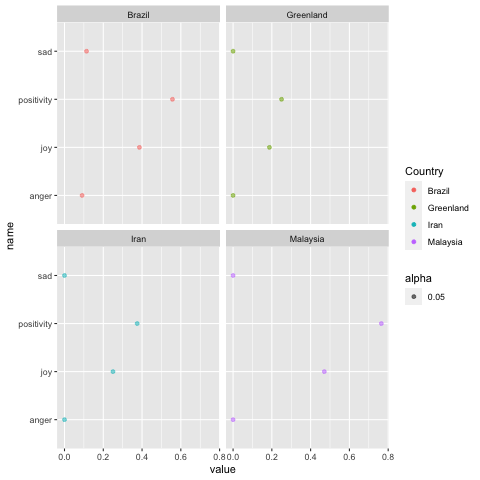

In [18]:
%%R


ggplot(highest_countries_df_r_columns) +
    aes(x=value, y=name, color=Country, alpha=.05) +
    geom_point() +
    facet_wrap(~Country)

# +annotate

# yes or no

# name / max_country

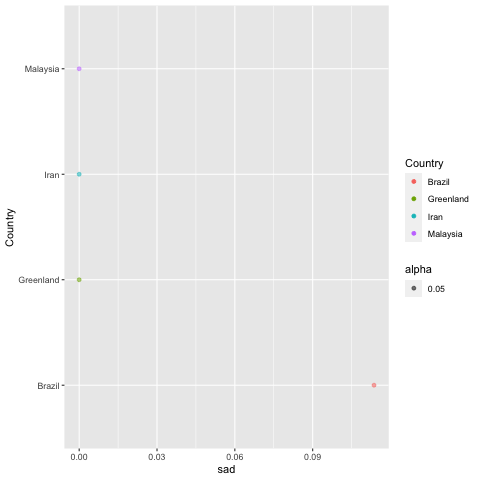

In [19]:
%%R


ggplot(highest_countries_df_r) +
    aes(x=sad, y=Country, color=Country, alpha=.05) +
    geom_point() 
# +annotate

# yes or no

# name / max_country

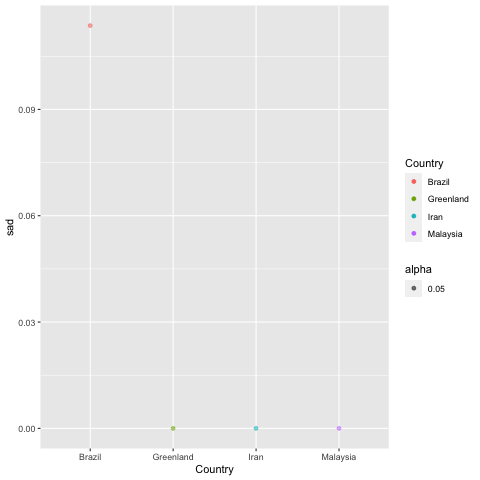

In [20]:
%%R


ggplot(highest_countries_df_r) +
    aes(x=Country, y=sad, color=Country, alpha=.05) +
    geom_point() 
# +annotate

# yes or no

# name / max_country

In [21]:
%%R


df_high_analysis_r_columns <- df_high_analysis_r %>% 
    select(Country, positivity, anger, sad, joy) %>%
    pivot_longer(-Country)
df_high_analysis_r_columns

# A tibble: 480 × 3
   Country name        value
   <chr>   <chr>       <dbl>
 1 Angola  positivity 0.393 
 2 Angola  anger      0.0714
 3 Angola  sad        0.0357
 4 Angola  joy        0.179 
 5 Belgium positivity 0.667 
 6 Belgium anger      0     
 7 Belgium sad        0.0667
 8 Belgium joy        0.267 
 9 Belize  positivity 0.44  
10 Belize  anger      0.06  
# … with 470 more rows
# ℹ Use `print(n = ...)` to see more rows


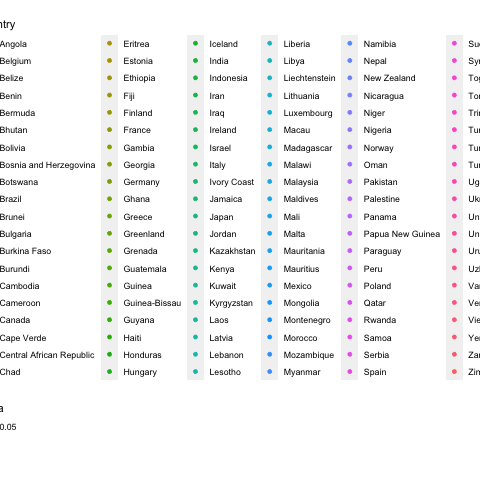

In [22]:
%%R


ggplot(df_high_analysis_r_columns) +
    aes(x=value, y=name, color=Country, alpha=.05) +
    geom_point() 
# +
#     facet_wrap(~Country)

# +annotate

# yes or no

# name / max_country

In [23]:
%%R


df_high_analysis_r_truncated <- df_high_analysis_r %>% 
    select(Country, positivity, anger, sad, joy) 


df_high_analysis_r_truncated

# A tibble: 120 × 5
   Country                positivity  anger    sad   joy
   <chr>                       <dbl>  <dbl>  <dbl> <dbl>
 1 Angola                      0.393 0.0714 0.0357 0.179
 2 Belgium                     0.667 0      0.0667 0.267
 3 Belize                      0.44  0.06   0.08   0.18 
 4 Benin                       0.519 0.0385 0.0577 0.308
 5 Bermuda                     0.548 0      0.0968 0.194
 6 Bhutan                      0.533 0      0      0.333
 7 Bolivia                     0.371 0.0431 0.172  0.267
 8 Bosnia and Herzegovina      0.438 0      0.125  0.188
 9 Botswana                    0.6   0      0      0.32 
10 Brazil                      0.557 0.0909 0.114  0.386
# … with 110 more rows
# ℹ Use `print(n = ...)` to see more rows


In [24]:
%%R

write.csv(df_high_analysis_r_columns, "df_high_analysis_r_columns.csv", row.names=FALSE)
write.csv(df_high_analysis_r, "df_high_analysis_r.csv", row.names=FALSE)
write.csv(df_high_analysis_r_truncated, "df_high_analysis_r_truncated.csv", row.names=FALSE)



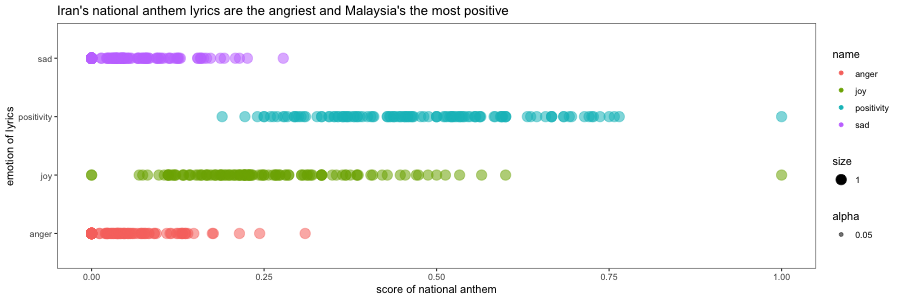

In [25]:
%%R -w 900 -h 300

ggplot(df_high_analysis_r_columns) +
    aes(x=value, y=name, color=name, size= 1, alpha=.05) +
    geom_point() + 
    theme_bw()+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    labs(
        title='Iran\'s national anthem lyrics are the angriest and Malaysia\'s the most positive',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )+
    ylab("emotion of lyrics") +
    xlab("score of national anthem") 


In [26]:
%%R -w 900 -h 300

ggplot(df_high_analysis_r_columns) +
    aes(x=value, y=name, color=name, size= 1, alpha=.05) +
    geom_point() + 
    theme_bw()+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    labs(
        title='Iran\'s national anthem lyrics are the angriest and Malaysia\'s the most positive',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )+
    ylab("emotion of lyrics") +
    xlab("score of national anthem")

ggsave('emotion_dot_plot.svg')

Saving 12.5 x 4.17 in image


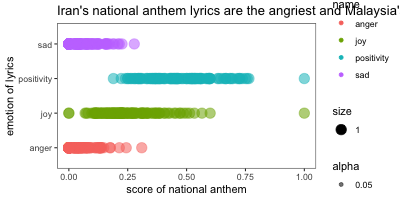

In [27]:
%%R -w 400 -h 200

ggplot(df_high_analysis_r_columns) +
    aes(x=value, y=name, color=name, size= 1, alpha=.05) +
    geom_point() + 
    theme_bw()+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    labs(
        title='Iran\'s national anthem lyrics are the angriest and Malaysia\'s the most positive',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )+
    ylab("emotion of lyrics") +
    xlab("score of national anthem")

In [28]:
%%R -w 400 -h 200

ggplot(df_high_analysis_r_columns) +
    aes(x=value, y=name, color=name, size= 1, alpha=.05) +
    geom_point() + 
    theme_bw()+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    labs(
        title='Iran\'s national anthem lyrics are the angriest and Malaysia\'s the most positive',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )+
    ylab("emotion of lyrics") +
    xlab("score of national anthem")

ggsave('emotion_dot_plot_smaller.svg')

Saving 5.56 x 2.78 in image


In [29]:
%%R

arrows2 <- 
  tibble(
    x1 = c(2600),
    x2 = c(2518.232),
    y1 = c(1.52), 
    y2 = c(1.52)
  )

arrows2

# A tibble: 1 × 4
     x1    x2    y1    y2
  <dbl> <dbl> <dbl> <dbl>
1  2600 2518.  1.52  1.52


# Here is the list of the top countries by emotion
#### joy=Latvia
#### sad=Italy
#### anger=Palestine
#### positive=Latvia
#### least joy=macau

In [30]:
# joy=Latvia
# sad=Italy
# anger=Palestine
# positive=Latvia